In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [64]:
torch.manual_seed(59)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [65]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [66]:
x =torch.tensor([2.0]) #pass a tensor into the model 
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [67]:
x1 = np.linspace(0.0,50.0, 50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [68]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Initial weight: {w1:.8f}, Initial bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(y1)

Initial weight: 0.10597813, Initial bias: 0.96379614

[0.96379614 1.07193709 1.18007804 1.28821899 1.39635994 1.50450089
 1.61264184 1.72078279 1.82892374 1.93706469 2.04520564 2.15334659
 2.26148754 2.36962849 2.47776944 2.58591039 2.69405134 2.80219229
 2.91033324 3.01847419 3.12661514 3.2347561  3.34289705 3.451038
 3.55917895 3.6673199  3.77546085 3.8836018  3.99174275 4.0998837
 4.20802465 4.3161656  4.42430655 4.5324475  4.64058845 4.7487294
 4.85687035 4.9650113  5.07315225 5.1812932  5.28943415 5.3975751
 5.50571605 5.613857   5.72199795 5.8301389  5.93827985 6.0464208
 6.15456175 6.2627027 ]


In [72]:
#create a column matrix of X values
x = torch.linspace(1,50,50).reshape(-1,1)
# x= torch.unsqueeze(torch.linspace(1,50,50), dim = 1) #equivalent
# Create a "random" array of error values
# We want 50 random integer values that collectively cancel each other out.
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(50,1),dtype=torch.float)
print(e.sum())
# Create a column matrix of y values
# set weight =2, bias =1, e (error)
y = 2*x + 1 + e
print(y.shape)

tensor(0.)
torch.Size([50, 1])


Text(0.5, 0, 'x')

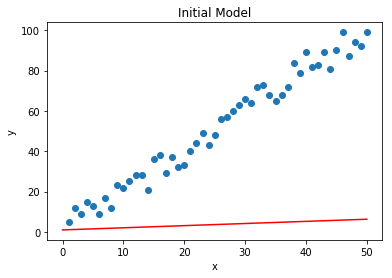

In [73]:
plt.scatter(x.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x')

In [74]:
# Set the loss function 
criterion =  nn.MSELoss()#evaluate network's performance based off mean squared error loss 

In [75]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)


In [76]:
epochs =50
losses = []
for i in range(epochs):
    i+=1
    y_pred = model.forward(x)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear.weight.item():10.8f} bias: {model.linear.bias.item():10.8f}') 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 3057.21679688  weight: 0.10597813 bias: 0.96379614
epoch:  2  loss: 1588.53100586  weight: 3.33490038 bias: 1.06046367
epoch:  3  loss: 830.30010986  weight: 1.01483274 bias: 0.99226278
epoch:  4  loss: 438.85241699  weight: 2.68179965 bias: 1.04252183
epoch:  5  loss: 236.76152039  weight: 1.48402119 bias: 1.00766504
epoch:  6  loss: 132.42912292  weight: 2.34460592 bias: 1.03396463
epoch:  7  loss: 78.56572723  weight: 1.72622538 bias: 1.01632178
epoch:  8  loss: 50.75775909  weight: 2.17050409 bias: 1.03025162
epoch:  9  loss: 36.40123367  weight: 1.85124576 bias: 1.02149546
epoch: 10  loss: 28.98922729  weight: 2.08060074 bias: 1.02903891
epoch: 11  loss: 25.16238213  weight: 1.91576838 bias: 1.02487016
epoch: 12  loss: 23.18647385  weight: 2.03416562 bias: 1.02911627
epoch: 13  loss: 22.16612816  weight: 1.94905841 bias: 1.02731562
epoch: 14  loss: 21.63911057  weight: 2.01017213 bias: 1.02985907
epoch: 15  loss: 21.36677170  weight: 1.96622372 bias: 1.02928054
ep

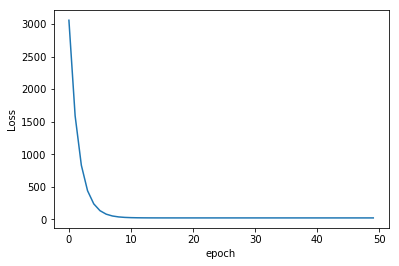

In [79]:
#plot the loss values 
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [80]:
#plot the result
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.98381913, Current bias: 1.05575156

[ 0.          1.02040816  2.04081633  3.06122449  4.08163265  5.10204082
  6.12244898  7.14285714  8.16326531  9.18367347 10.20408163 11.2244898
 12.24489796 13.26530612 14.28571429 15.30612245 16.32653061 17.34693878
 18.36734694 19.3877551  20.40816327 21.42857143 22.44897959 23.46938776
 24.48979592 25.51020408 26.53061224 27.55102041 28.57142857 29.59183673
 30.6122449  31.63265306 32.65306122 33.67346939 34.69387755 35.71428571
 36.73469388 37.75510204 38.7755102  39.79591837 40.81632653 41.83673469
 42.85714286 43.87755102 44.89795918 45.91836735 46.93877551 47.95918367
 48.97959184 50.        ]
[  1.05575156   3.08005679   5.10436203   7.12866726   9.15297249
  11.17727772  13.20158295  15.22588818  17.25019342  19.27449865
  21.29880388  23.32310911  25.34741434  27.37171957  29.39602481
  31.42033004  33.44463527  35.4689405   37.49324573  39.51755096
  41.5418562   43.56616143  45.59046666  47.61477189  49.63907712
  51.66

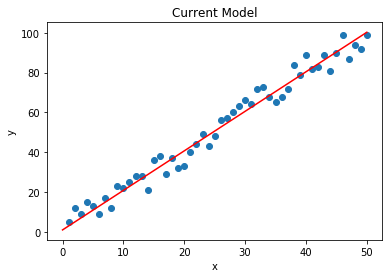

In [82]:
plt.scatter(x.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');

<div class="alert alert-info"><strong>### Steps</strong><br>

1. Set a reasonably large number of passes<br>
<tt><font color=black>epochs = 50</font></tt><br>
2. Create a list to store loss values. This will let us view our progress afterward.<br>
<tt><font color=black>losses = []</font></tt><br>
<tt><font color=black>for i in range(epochs):</font></tt><br>
3. Bump "i" so that the printed report starts at 1<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;i+=1</font></tt><br>
4. Create a prediction set by running "X" through the current model parameters<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;y_pred = model.forward(X)</font></tt><br>
5. Calculate the loss<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;loss = criterion(y_pred, y)</font></tt><br>
6. Add the loss value to our tracking list<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;losses.append(loss)</font></tt><br>
7. Print the current line of results<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;print(f'epoch: {i:2} loss: {loss.item():10.8f}')</font></tt><br>
8. Gradients accumulate with every backprop. To prevent compounding we need to reset the stored gradient for each new epoch.<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.zero_grad()</font></tt><br>
9. Now we can backprop<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;loss.backward()</font></tt><br>
10. Finally, we can update the hyperparameters of our model<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.step()</font></tt>
</div>